In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy as dp
from skimage import transform as tf
%matplotlib inline

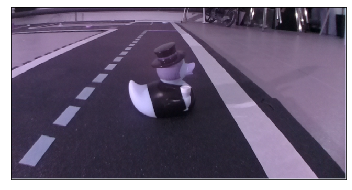

In [9]:
def imShow(img):
    plt.imshow(img, cmap="gray")
    plt.xticks([]), plt.yticks([])
    plt.show()
    

def showImg(images, size, labels=None, figsize=(14, 14)):
    
    fig = plt.figure(figsize=figsize)
    for i in range(1, size[0]*size[1] + 1):
        ax = fig.add_subplot(size[0], size[1], i)
        if labels:
            ax.set_title(labels[i - 1])
        plt.imshow(images[i-1], cmap="gray")
        plt.xticks([]), plt.yticks([])
    plt.show()
    
def getHist(img):
    first_channel = cv2.calcHist([img], [0], None, [256],[0,256])
    second_channel = cv2.calcHist([img], [1], None, [256],[0,256])
    third_channel = cv2.calcHist([img], [2], None, [256],[0,256])
    
    first_channel = np.reshape( first_channel, (256) ).astype(np.int64)
    second_channel = np.reshape( second_channel, (256) ).astype(np.int64)
    third_channel = np.reshape( third_channel, (256) ).astype(np.int64)
    
    return (first_channel, second_channel, third_channel)

def showHist(hist, figsize=(14, 5)):
    fig = plt.figure(figsize=figsize)
    
    ax_1 = fig.add_subplot(1, 3, 1)
    ax_1.set_title("l channel")
    line1, = plt.plot(hist[0], color = (0, 0, 0))
    
    ax_2 = fig.add_subplot(1, 3, 2)
    ax_2.set_title("a channel")
    line2, = plt.plot(hist[1], color = (0, 0, 0))
    
    ax_3 = fig.add_subplot(1, 3, 3)
    ax_3.set_title("b channel")
    line1, = plt.plot(hist[2], color = (0, 0, 0))
    
    plt.show()
    
road = cv2.imread("new_camera.png")
road = cv2.resize(road, (640, 480))
road = road[150:]
imShow(road)

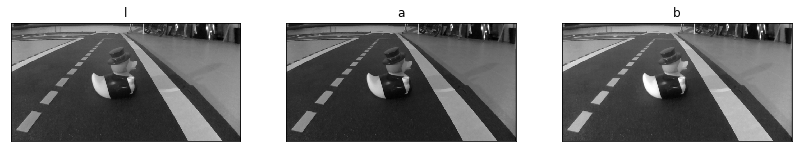

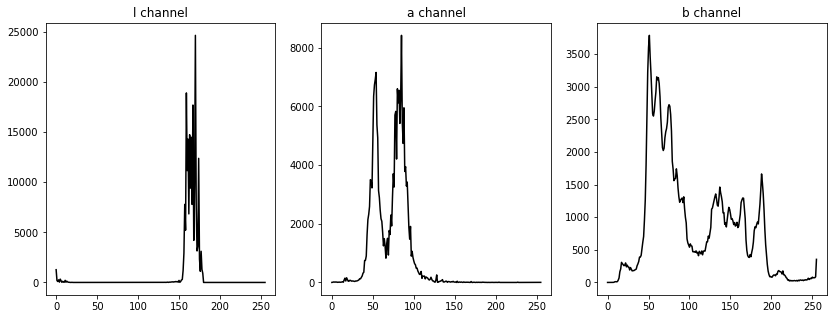

In [11]:
lab_road = cv2.cvtColor(road, cv2.COLOR_BGR2HSV)
l, a, b = cv2.split(dp(road))

hist_l, hist_a, hist_b = getHist( dp(lab_road) )

showImg([l, a, b], (1, 3), ("l", "a", "b"))
showHist([hist_l, hist_a, hist_b])

In [184]:
def BHEMHB(hist, img):
    h, w = img.shape
    
    repeats = np.repeat( np.arange(0, 256), hist )
    median_index = int( np.floor((h*w) / 2 + 1))
    median = repeats[median_index]
    
    print(median)
    #median = 170
    
    min_val = repeats[0]
    max_val = repeats[-1]
    
    norm_hist = hist / ( h * w )
    
    p_low = norm_hist[0:median]
    p_up = norm_hist[median:]
    
    p_low = np.log2(p_low + 1)
    p_up = np.log2(p_up + 1)
    
    cs_low = np.cumsum(p_low)
    cs_up = np.cumsum(p_up)
    
    for i in range(h):
        for j in range(w):
            if img[i, j] < median:
                img[i, j] = min_val + (median - 1 - min_val) * cs_low[ img[i, j] ]
            else:
                img[i, j] = median + (max_val - median) * cs_up[ img[i, j] - median ]
                
    return img

17


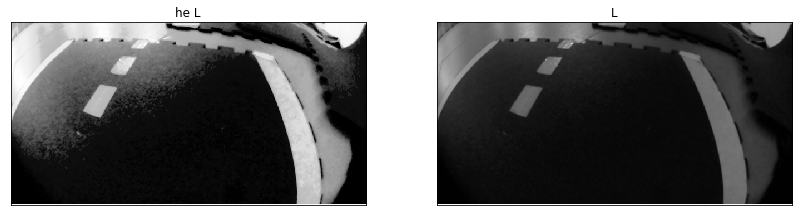

In [185]:
res_l = BHEMHB( dp(hist_l), dp(l) )
showImg([res_l, l], (1, 2), ("he L", "L"))

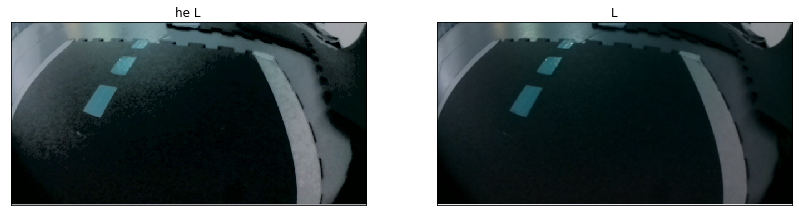

In [188]:
res = cv2.cvtColor( cv2.merge((res_l, a, b)), cv2.COLOR_LAB2BGR  ) 
showImg([res, road], (1, 2), ("he L", "L"))

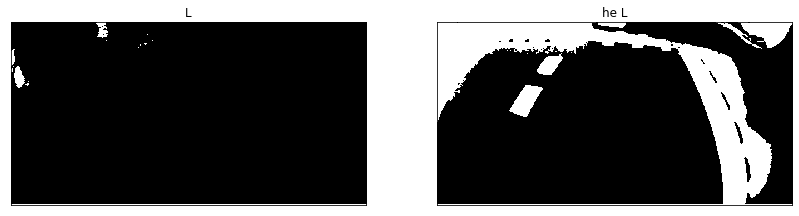

In [190]:
_, thresh_L_he = cv2.threshold(res_l, 97, 255, cv2.THRESH_BINARY)
_, thresh_L = cv2.threshold(l, 150, 255, cv2.THRESH_BINARY)

showImg([thresh_L, thresh_L_he], (1, 2), ("L", "he L"))

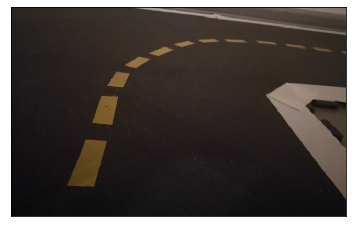

In [191]:
bad_road = cv2.imread("bad_light.jpg")
bad_road = cv2.GaussianBlur(bad_road, (7, 7), 0)
bad_road = cv2.cvtColor( bad_road, cv2.COLOR_RGB2BGR )
bad_road = cv2.resize(bad_road, (640, 480))
bad_road = bad_road[80:]
imShow(bad_road)

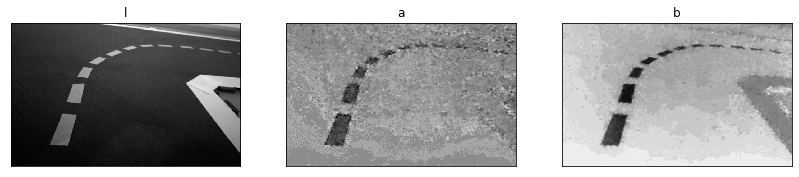

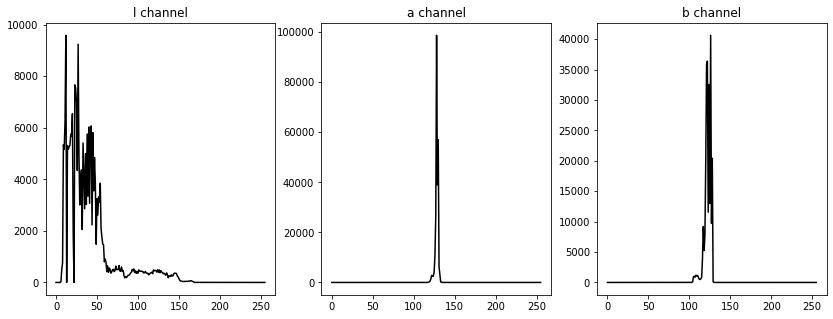

In [192]:
bad_lab_road = cv2.cvtColor(bad_road, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(dp(bad_lab_road))
bad_lab_road = cv2.merge( [l, a, b] )


hist_l, hist_a, hist_b = getHist( dp(bad_lab_road) )

showImg([l, a, b], (1, 3), ("l", "a", "b"))
showHist([hist_l, hist_a, hist_b])

33


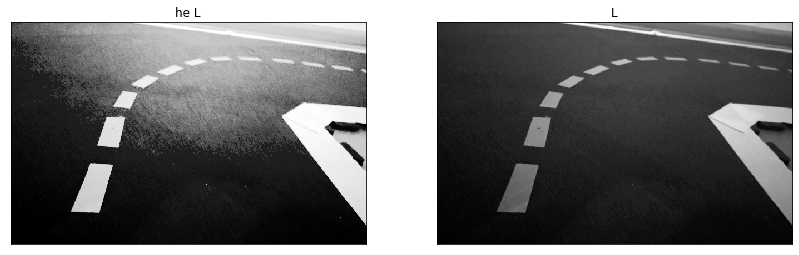

In [193]:
res_l = BHEMHB( dp(hist_l), dp(l) )
showImg([res_l, l], (1, 2), ("he L", "L"))

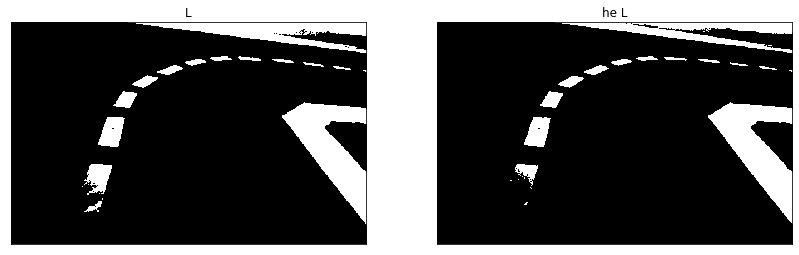

In [194]:
_, thresh_L_he = cv2.threshold(res_l, 113, 255, cv2.THRESH_BINARY)
_, thresh_L = cv2.threshold(l, 70, 255, cv2.THRESH_BINARY)

showImg([thresh_L, thresh_L_he], (1, 2), ("L", "he L"))

In [148]:
val, _ = cv2.threshold(l, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(val)

70.0
